In [3]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
        # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | rawah
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | unity
Processing Record 6 of Set 1 | sorong
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | joanopolis
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | nizhnevartovsk
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | lewiston
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | tsiroanomandidy
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | hithadh

Processing Record 34 of Set 4 | nyurba
Processing Record 35 of Set 4 | daxian
City not found. Skipping...
Processing Record 36 of Set 4 | halifax
Processing Record 37 of Set 4 | port shepstone
Processing Record 38 of Set 4 | khasan
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | escanaba
Processing Record 41 of Set 4 | turukhansk
Processing Record 42 of Set 4 | iralaya
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | petawawa
Processing Record 45 of Set 4 | kurilsk
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | balsas
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | salalah
Processing Record 1 of Set 5 | haapiti
Processing Record 2 of Set 5 | tottori
Processing Record 3 of Set 5 | mutoko
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | phan thiet
Processing Record 6 of Set 5 | banda aceh
Processing Record 7 of Set 5 | port 

Processing Record 23 of Set 8 | ixtapa
Processing Record 24 of Set 8 | sao felix do xingu
Processing Record 25 of Set 8 | gunjur
Processing Record 26 of Set 8 | marawi
Processing Record 27 of Set 8 | vanimo
Processing Record 28 of Set 8 | gushikawa
Processing Record 29 of Set 8 | buala
Processing Record 30 of Set 8 | mirnyy
Processing Record 31 of Set 8 | ahtopol
Processing Record 32 of Set 8 | zuwarah
Processing Record 33 of Set 8 | port pirie
Processing Record 34 of Set 8 | balkhash
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | mecca
Processing Record 37 of Set 8 | dubreka
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | eureka
Processing Record 40 of Set 8 | sobolevo
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | lancaster
Processing Record 43 of Set 8 | hudson bay
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | havoysund
Processing Record 46 of 

Processing Record 7 of Set 12 | sokoni
Processing Record 8 of Set 12 | palmer
Processing Record 9 of Set 12 | bac lieu
Processing Record 10 of Set 12 | oskemen
Processing Record 11 of Set 12 | jumla
Processing Record 12 of Set 12 | axim
Processing Record 13 of Set 12 | dongsheng
Processing Record 14 of Set 12 | careiro da varzea
Processing Record 15 of Set 12 | concordia
Processing Record 16 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 17 of Set 12 | vardo
Processing Record 18 of Set 12 | santa ines
Processing Record 19 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 20 of Set 12 | hamilton
Processing Record 21 of Set 12 | naze
Processing Record 22 of Set 12 | iquique
Processing Record 23 of Set 12 | deputatskiy
Processing Record 24 of Set 12 | batagay
Processing Record 25 of Set 12 | warwick
Processing Record 26 of Set 12 | tenenkou
Processing Record 27 of Set 12 | nyrob
Processing Record 28 of Set 12 | albury
Processing Record 29 of S

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [9]:
new_column_order = ["City", "Country" ,"Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

NameError: name 'city_data_df' is not defined

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [11]:
city_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(city_data_to_load)
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643847068.8560395

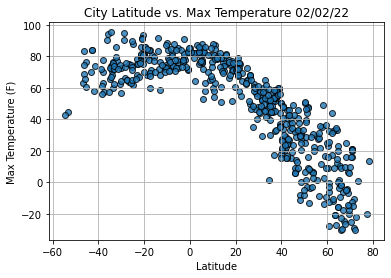

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

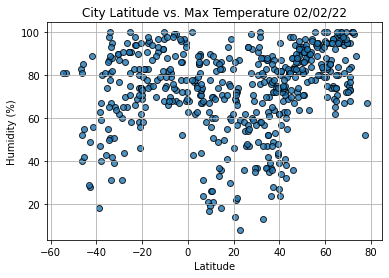

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

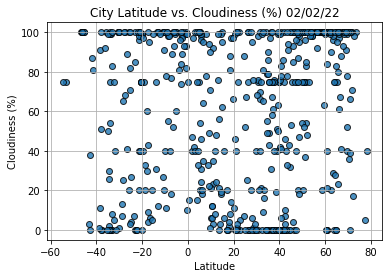

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

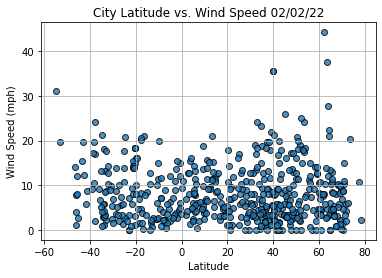

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Avarua
Country                        CK
Date          2022-02-01 03:38:43
Lat                      -21.2078
Lng                      -159.775
Max Temp                    78.85
Humidity                       83
Cloudiness                     20
Wind Speed                   13.8
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

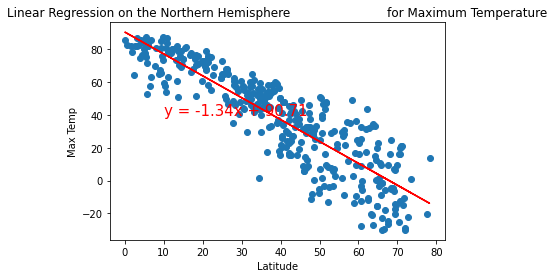

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

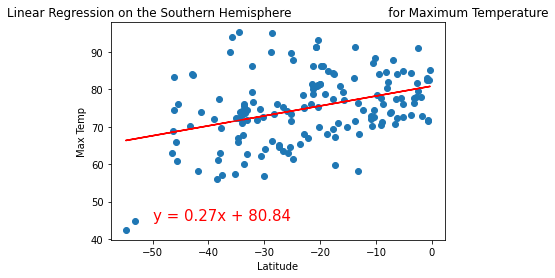

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,45))

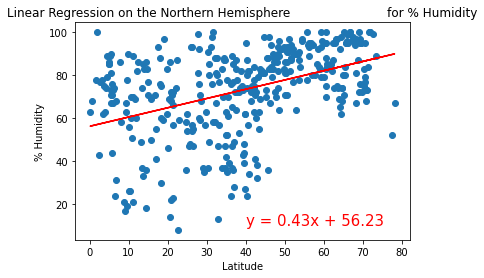

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

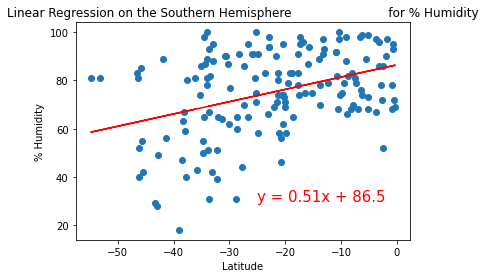

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,30))

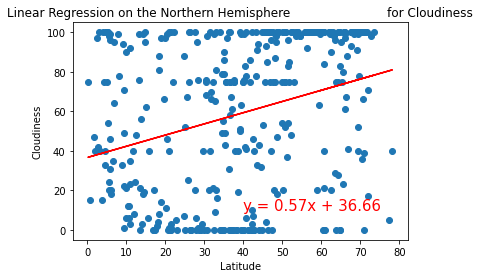

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

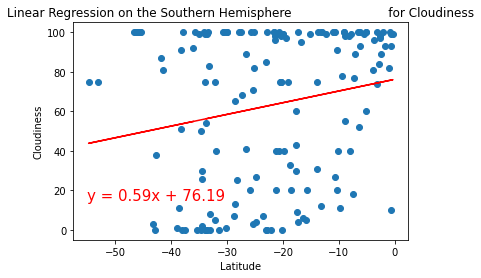

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-55,15))

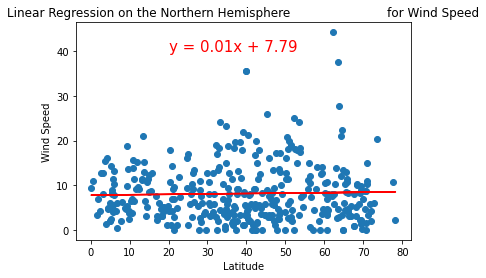

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,40))

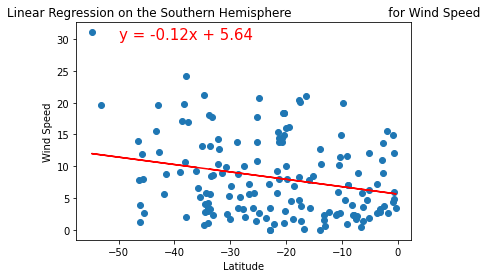

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))

In [28]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.2451994259165355


In [29]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [30]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Dikson,RU,2022-02-01 03:38:39,73.5069,80.5464,0.99,89,100,20.31
1,1,Rawah,IQ,2022-02-01 03:38:40,34.4816,41.9093,43.77,87,79,0.11
2,2,Chuy,UY,2022-02-01 03:38:40,-33.6971,-53.4616,59.99,67,0,5.70
3,3,Saldanha,ZA,2022-02-01 03:38:40,-33.0117,17.9442,62.65,95,8,8.70
4,4,Unity,CA,2022-02-01 03:38:41,52.4501,-109.1682,-3.75,90,100,18.05


In [31]:
#Get the data types.
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [33]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [34]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = [latitude, longitude]
# 2. Assign the weights variable to some values.
temperatures = city_data_df["Max Temp"].astype(float)
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
fig

NameError: name 'latitude' is not defined

In [35]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [39]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp],
dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))